In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("/content/drive/MyDrive/credit card churn prediction- campusx/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.duplicated().sum()

0

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
df=df.drop(columns=['RowNumber','CustomerId', 'Surname'])

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df= pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [16]:
X= df.drop(columns='Exited')
y=df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain ,ytest= train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrainscaled=scaler.fit_transform(xtrain)
xtestscaled=scaler.fit_transform(xtest)

In [20]:
xtrainscaled.shape

(8000, 11)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model=Sequential()

model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(1, activation='sigmoid'))

**with sigmoid activation**

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
model.fit(xtrainscaled, ytrain, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 1.1017
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.8234
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6706
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5901
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5477
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5251
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5118
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5020
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4929
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4838


In [29]:
model.layers[0].get_weights()

[array([[-4.77313280e-01,  2.98236720e-02, -3.10132504e-01],
        [ 4.60924149e-01,  9.09721673e-01, -3.93506706e-01],
        [-1.24583185e-01, -2.10958794e-01,  5.46806455e-01],
        [ 2.44350955e-01,  3.35715681e-01, -5.28058231e-01],
        [-6.29849285e-02, -6.18616700e-01,  2.22561136e-01],
        [-3.38594824e-01, -1.20578064e-02,  3.81708711e-01],
        [ 6.21283241e-02, -5.99826097e-01,  6.17898583e-01],
        [-1.22904316e-01,  2.19166964e-01, -4.42259312e-01],
        [ 9.89900529e-02,  6.40226543e-01, -5.49591959e-01],
        [-4.72763568e-01,  2.55295753e-01, -5.19290450e-04],
        [-6.85598612e-01, -4.84586477e-01,  8.18226993e-01]], dtype=float32),
 array([-0.5995562 , -0.75700796, -0.19839753], dtype=float32)]

In [30]:
model.layers[1].get_weights()

[array([[ 0.05583723],
        [ 0.41614184],
        [-0.48838714]], dtype=float32),
 array([-1.1903425], dtype=float32)]

In [32]:
temp_y=model.predict(xtestscaled)

63/63 [==============================] - 0s 1ms/step


In [34]:
ypred=np.where(temp_y>0.5, 1, 0)

In [35]:
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [36]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(ytest,ypred)

0.7975

In [38]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 **with relu activation**

In [39]:
 model1=Sequential()

model1.add(Dense(3, activation='relu', input_dim=11))
model1.add(Dense(1, activation='sigmoid'))

In [41]:
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model1.fit(xtrainscaled, ytrain, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.8527
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6134
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5335
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4939
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4690
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4508
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4219
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4096
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3996


In [48]:
temp_y1=model1.predict(xtestscaled)
ypred1=np.where(temp_y1>0.5, 1, 0)

63/63 [==============================] - 0s 4ms/step


In [49]:
accuracy_score(ytest,ypred1)

0.834

**adding more layers and neurons and increseing epochs**

In [57]:
model2=Sequential()

model2.add(Dense(10, activation='relu', input_dim=11))
model2.add(Dense(5, activation='relu', input_dim=11))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
nn= model2.fit(xtrainscaled, ytrain, epochs=30, validation_split=0.2)

Epoch 1/30
200/200 [==============================] - 2s 3ms/step - loss: 0.5347 - accuracy: 0.7811 - val_loss: 0.4934 - val_accuracy: 0.7962
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7995 - val_loss: 0.4575 - val_accuracy: 0.8019
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8037 - val_loss: 0.4415 - val_accuracy: 0.8094
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8108 - val_loss: 0.4319 - val_accuracy: 0.8131
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8183 - val_loss: 0.4246 - val_accuracy: 0.8169
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8208 - val_loss: 0.4200 - val_accuracy: 0.8213
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8228 - val_loss: 0.4157 - val_accuracy: 0.8225
Epoch 

In [55]:
temp_y2=model2.predict(xtestscaled)
ypred2=np.where(temp_y2>0.5, 1, 0)

63/63 [==============================] - 0s 2ms/step


In [56]:
accuracy_score(ytest,ypred2)

0.8575

In [63]:
nn.history

{'loss': [0.5347326397895813,
  0.46684402227401733,
  0.4397491216659546,
  0.4266475439071655,
  0.4181736409664154,
  0.41138285398483276,
  0.40596380829811096,
  0.4014306366443634,
  0.3967303931713104,
  0.3918713331222534,
  0.386677086353302,
  0.3818514943122864,
  0.37737342715263367,
  0.3731573224067688,
  0.3681836426258087,
  0.36296555399894714,
  0.3588579297065735,
  0.3558978736400604,
  0.3525506556034088,
  0.35003361105918884,
  0.3482494652271271,
  0.3460727035999298,
  0.3440609872341156,
  0.3425958752632141,
  0.3414248526096344,
  0.3398549258708954,
  0.33911606669425964,
  0.33814841508865356,
  0.3368260860443115,
  0.3361685574054718],
 'accuracy': [0.7810937762260437,
  0.7995312213897705,
  0.8037499785423279,
  0.8107812404632568,
  0.8182812333106995,
  0.8207812309265137,
  0.8228124976158142,
  0.8267187476158142,
  0.8284375071525574,
  0.8326562643051147,
  0.8339062333106995,
  0.8387500047683716,
  0.8412500023841858,
  0.8443750143051147,
  0.

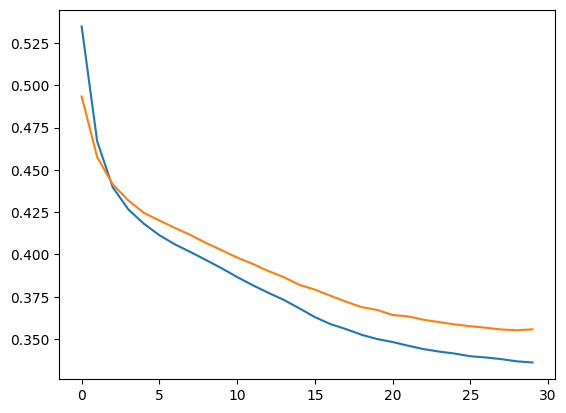

In [60]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])


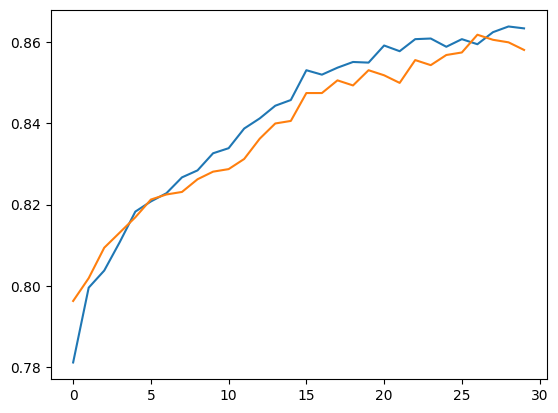

In [65]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])